## SVM - Support Vector machine

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

Effective in high dimensional spaces.
Still effective in cases where number of dimensions is greater than the number of samples.
Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
The disadvantages of support vector machines include:

If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

In [5]:
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

In [26]:
#!/usr/bin/python

#from udacityplots import *
import warnings
warnings.filterwarnings("ignore")

import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")  

Linear SVM Accuracy  92.0 %


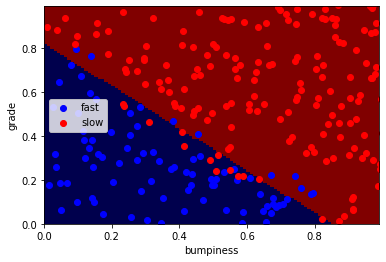

In [14]:
import sys 
import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl


features_train, labels_train, features_test, labels_test = makeTerrainData()


########################## SVM #################################
### we handle the import statement and SVC creation for you here
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel="linear")
clf.fit(features_train, labels_train)
pred = clf.predict(features_test) 
print ("Linear SVM Accuracy " , accuracy_score(pred,labels_test)*100 ,"%")
%matplotlib inline
### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)



poly SVM Accuracy  91.60000000000001 %


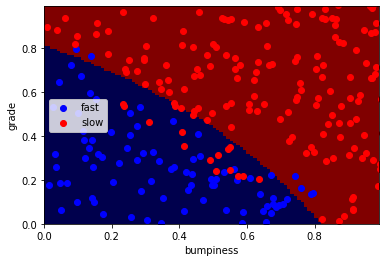

In [15]:
clf = SVC(kernel="poly")
clf.fit(features_train, labels_train)
pred = clf.predict(features_test) 
print ("poly SVM Accuracy " , accuracy_score(pred,labels_test)*100 ,"%") 
### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)

rbf SVM Accuracy  91.60000000000001 %


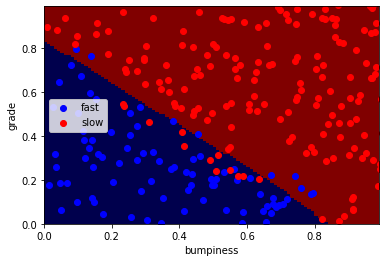

In [30]:

clf = SVC(kernel="rbf",C=2,gamma=1)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test) 
print ("rbf SVM Accuracy " , accuracy_score(pred,labels_test)*100 ,"%") 
### draw the decision boundary with the text points 
prettyPicture(clf, features_test, labels_test)

In [1]:
import pickle
import _pickle as cPickle
import numpy

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif



def preprocess(words_file = "../tools/word_data.pkl", authors_file="../tools/email_authors.pkl"):
    """ 
        this function takes a pre-made list of email texts (by default word_data.pkl)
        and the corresponding authors (by default email_authors.pkl) and performs
        a number of preprocessing steps:
            -- splits into training/testing sets (10% testing)
            -- vectorizes into tfidf matrix
            -- selects/keeps most helpful features
        after this, the feaures and labels are put into numpy arrays, which play nice with sklearn functions
        4 objects are returned:
            -- training/testing features
            -- training/testing labels
    """

    ### the words (features) and authors (labels), already largely preprocessed
    ### this preprocessing will be repeated in the text learning mini-project
    authors_file_handler = open(authors_file, "rb")
    authors = pickle.load(authors_file_handler)
    authors_file_handler.close()

    words_file_handler = open(words_file, "rb")
    word_data = cPickle.load(words_file_handler)
    words_file_handler.close()

    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    features_train, features_test, labels_train, labels_test = train_test_split(word_data, authors, test_size=0.4, random_state=42)



    ### text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)



    ### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
    selector = SelectPercentile(f_classif, percentile=10)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()

    ### info on the data
    print ("no. of Chris training emails:", sum(labels_train))
    print ("no. of Sara training emails:", len(labels_train)-sum(labels_train))
    
    return features_train_transformed, features_test_transformed, labels_train, labels_test

Author Id accuracy

In [2]:
"""
    This is the code to accompany the Lesson 1 (Naive Bayes) mini-project. 
    Use a Naive Bayes Classifier to identify emails by their authors
    
    authors and labels:
    Sara has label 0
    Chris has label 1
    
"""
import sys
from time import time
sys.path.append("../tools/")
features_train, features_test, labels_train, labels_test = preprocess()

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel="linear")
clf.fit(features_train, labels_train)
pred = clf.predict(features_test) 
t0 = time()
clf.fit(features_train, labels_train) 
print ("training time: %s s"% round(time()-t0, 3))
### use the trained classifier to predict labels for the test features
pred = clf.predict(features_test) 
print ("Sklearn Accuracy " , accuracy_score(pred,labels_test)*100 ,"%")

no. of Chris training emails: 5283
no. of Sara training emails: 5263
training time: 161.779 s
Sklearn Accuracy  98.03754266211604 %


In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_train_SEt_pred = clf.predict(features_train)
cnf_matrix = confusion_matrix(labels_train, y_train_SEt_pred) 

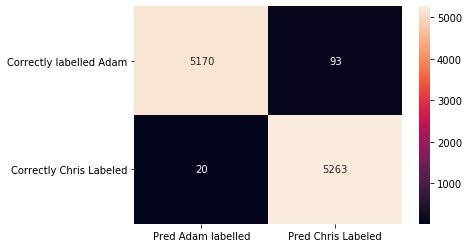

In [14]:
import pandas as pd 
true_class_names = ['Correctly labelled Adam', 'Correctly Chris Labeled']
predicted_class_names = ['Pred Adam labelled', 'Pred Chris Labeled']
df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

In [23]:
features_train_sml = features_train[:int(len(features_train)/100)] 
labels_train_sml = labels_train[:int(len(labels_train)/100)] 
t0 = time()
clf.fit(features_train_sml, labels_train_sml) 
print ("training time: %s s"% round(time()-t0, 3))
pred = clf.predict(features_test) 
print ("Sklearn Accuracy " , accuracy_score(pred,labels_test)*100 ,"%")

105
training time: 0.05 s
Sklearn Accuracy  81.12912400455062 %


In [36]:
features_train_sml = features_train[:int(len(features_train)/100)] 
labels_train_sml = labels_train[:int(len(labels_train)/100)] 
t0 = time()
clf = SVC(kernel="rbf",C=1)
clf.fit(features_train, labels_train) 
print ("training time: %s s"% round(time()-t0, 3))
pred = clf.predict(features_test) 
print ("Sklearn Accuracy " , accuracy_score(pred,labels_test)*100 ,"%") 

training time: 426.799 s
Sklearn Accuracy  50.02844141069397 %


In [37]:
t0 = time()
clf = SVC(kernel="rbf",C=10000)
clf.fit(features_train_sml, labels_train_sml) 
print ("training time: %s s"% round(time()-t0, 3))
pred = clf.predict(features_test) 
print ("Sklearn Accuracy " , accuracy_score(pred,labels_test)*100 ,"%") 

training time: 0.105 s
Sklearn Accuracy  90.41524459613197 %


In [44]:
## Chris class
count = 0 
for a in pred:
    count = count +1
print (count)

7032
